In [125]:
import re
import pandas as pd
import numpy as np
import requests


data = requests.get("https://www.gutenberg.org/cache/epub/1934/pg1934.txt", verify=False)

/Users/marenrieker/.local/share/virtualenvs/Assignments-GLOq7LzH/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.gutenberg.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [126]:
##EXERCISE 1 - PARSING POEMS INTO DATAFRAME
text = data.text

In [127]:
index_start = text.find("The Voice of the Ancient Bard\r\n\r\n\r\n\r\n\r\n") 
index_start += len("The Voice of the Ancient Bard\r\n\r\n\r\n\r\n\r\n")
#index_end = text.find("*** END OF THE PROJECT GUTENBERG EBOOK SONGS OF INNOCENCE ANF OF EXPERIENCE ***")
index_end = text.find("And wish to lead others, when they should be led.")

In [128]:
#selecting text from index start to end
text = text[index_start:index_end]

In [129]:
list_poems = text.split("\r\n\r\n\r\n\r\n\r\n")
#note that the last line of the last poem is missing; there seems to be a problem with splitting before
#"*** END OF THE PROJECT GUTENBERG EBOOK SONGS OF INNOCENCE ANF OF EXPERIENCE ***", but i chose to keep this
#mistake rather than extracting the last line but also extracting many lines of unnecessary legal statements
#fix if time

In [130]:
list_poems_new = list_poems[:20] + [list_poems[20] + '\r\n' + poem for poem in list_poems[21:]]

In [131]:
pattern = re.compile("[A-Z]+\s?[A-Z]{2}")
def poem_data(poem):
    title = ''
    l = []
    stanza = -1
    line_number = -1
    book_title = "SONGS OF INNOCENCE"
    if poem.split("\r\n")[0] == 'SONGS OF EXPERIENCE':
        book_title = 'SONGS OF EXPERIENCE'
    for zeile in poem.split("\r\n"):
        if zeile == "":
            stanza += 1
        if zeile != "":
            line_number = line_number + 1
        if re.match(pattern, zeile) != None:
            title = zeile
        l.append({"poem_title" : title, "stanza_number" : stanza, 
                  "line_number" : line_number, 'book_title': book_title,
                 'line': zeile})
    return pd.DataFrame.from_records(l)
    

In [132]:
poem_l = [poem_data(poem) for poem in list_poems_new]

In [133]:
df = pd.concat(poem_l)

In [134]:
df = df[(df['poem_title'] != 'songs of innocence') & (df['poem_title'] != 'songs of experience') & (df['line'] != '')] 

In [135]:
#delete poem titles that were assigned from book titles
df = df[df.poem_title != df.line]

#substracting 1 from the stanza_number, because it somehow starts directly from two
df['stanza_number'] = [st_n - 1 for st_n in df.stanza_number]

In [136]:
df

,poem_title,stanza_number,line_number,book_title,line
3,INTRODUCTION,0,1,SONGS OF INNOCENCE,"Piping down the valleys wild,"
4,INTRODUCTION,0,2,SONGS OF INNOCENCE,"Piping songs of pleasant glee,"
5,INTRODUCTION,0,3,SONGS OF INNOCENCE,"On a cloud I saw a child,"
6,INTRODUCTION,0,4,SONGS OF INNOCENCE,And he laughing said to me:
8,INTRODUCTION,1,5,SONGS OF INNOCENCE,‘Pipe a song about a Lamb!’
...,...,...,...,...,...
9,THE VOICE OF THE ANCIENT BARD,0,7,SONGS OF EXPERIENCE,Folly is an endless maze;
10,THE VOICE OF THE ANCIENT BARD,0,8,SONGS OF EXPERIENCE,Tangled roots perplex her ways;
11,THE VOICE OF THE ANCIENT BARD,0,9,SONGS OF EXPERIENCE,How many have fallen there!
12,THE VOICE OF THE ANCIENT BARD,0,10,SONGS OF EXPERIENCE,They stumble all night over bones of the dead;


In [137]:
##EXERCISE 2 - VISUALISATION OF DATA

#libraries here
import matplotlib.pyplot as plt
import seaborn as sns

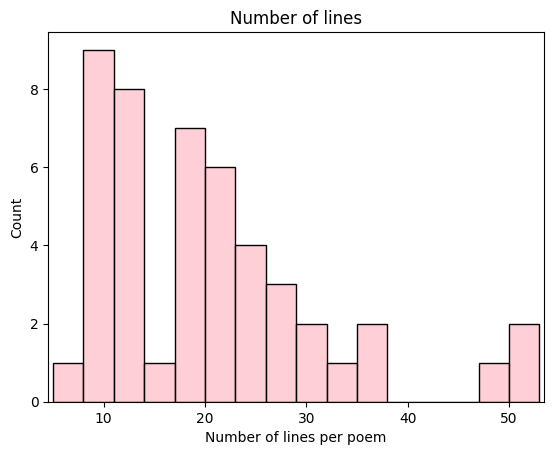

In [138]:
#HISTOGRAM NUMBER OF LINES PER POEM

#group_poem contains the highest line number of each poem in both books
group_poem = df.groupby(["book_title", "poem_title"])["line_number"].max().reset_index()

#plot it
hist = sns.histplot(
    group_poem, 
    x = "line_number", 
    color = "pink", 
    binwidth = 3)
hist.set_title("Number of lines")
hist.set_xlabel("Number of lines per poem")
plt.margins(x=.01)
plt.show()

In [139]:
#document feature matrix treating each line as a document

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pprint

lines = df.line
vectorizer = CountVectorizer(stop_words = "english")
vects = vectorizer.fit_transform(lines)
dfmline = pd.DataFrame(vects.todense(),
        columns = vectorizer.get_feature_names_out())
dfmline

,abroad,ache,admired,afar,age,aged,agree,ah,air,albion,...,wrath,wren,writ,write,wrote,year,young,youth,youthful,zeal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
#document feature matrix treating each poem as a document

group = (df
       .groupby(["book_title", 'poem_title'])['line']
       .aggregate(lambda x: ' '.join(x))
       .reset_index()
       )

poems = group.poem_title
vectorizer = CountVectorizer(stop_words = "english")
vects = vectorizer.fit_transform(poems)
dfmpoem = pd.DataFrame(vects.todense(),
        columns = vectorizer.get_feature_names_out())

dfmpoem

,abstract,ancient,angel,answer,bard,black,blossom,boy,chimney,clod,...,songs,sorrow,spring,sweeper,thursday,tiger,tirzah,tree,vagabond,voice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
#create plot that compares frequencies of words in each book

dfm = vectorizer.fit_transform(group[group.book_title == "SONGS OF EXPERIENCE"].line)

top20_exp = pd.DataFrame(dfm.todense(), columns = vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)[1:20]

#somehow this turned out to be a series, so it is going to become a dataframe now
top20_exp = top20_exp.to_frame()


top20_exp['index1'] = top20_exp.index #fair enough

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

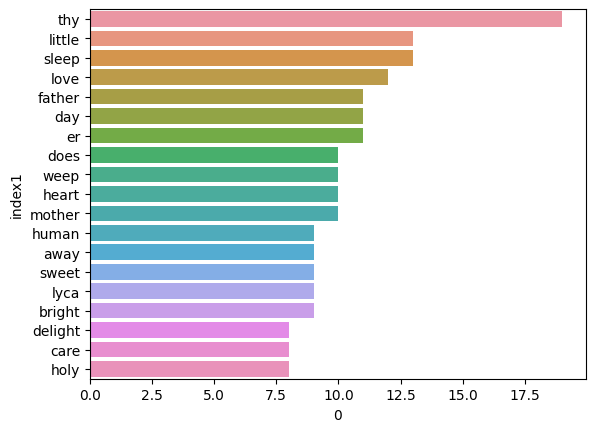

In [232]:
sns.barplot(data = top20_exp, 
            y = "index1", 
            x = 0)
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 20 words in 'Songs of Experience'")
plt.show(fig)


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

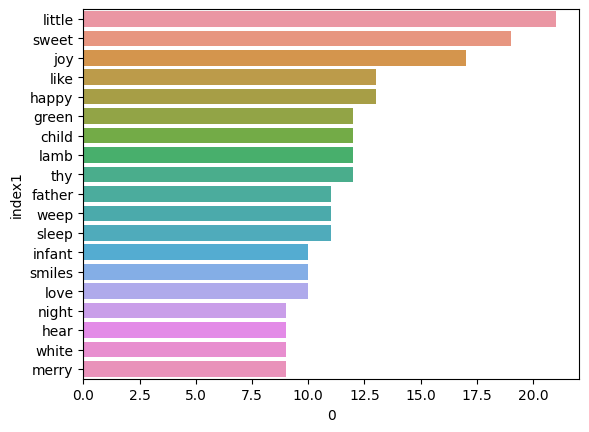

In [268]:
dfm = vectorizer.fit_transform(group[group.book_title == "SONGS OF INNOCENCE"].line)

top20_inn = pd.DataFrame(dfm.todense(), columns = vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)[1:20]
top20_inn = top20_inn.to_frame()
top20_inn['index1'] = top20_inn.index

inn = sns.barplot(data = top20_inn, 
                  y = "index1", 
                  x = 0)
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 20 words in 'Songs of Innocence'")
plt.show(fig)




In [245]:
##EXERCISE 3 - Parsing XML Text Data

import bs4

#retrieve session
docxml = requests.get("https://www.bundestag.de/resource/blob/915646/552d8629012162f1bd35c703015e58b6/20060-data.xml")

doc = docxml.text

In [247]:
#list of elements
soup = bs4.BeautifulSoup(doc, "html")

/Users/marenrieker/.local/share/virtualenvs/Assignments-GLOq7LzH/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [306]:
#make dataframe

df = pd.DataFrame(columns= ['speaker', 'party', 'text'])

for speech in soup.find_all('rede'):
    if speech.find('titel') != None:
        title = speech.find('titel').text
    else:
        title = ''
    if speech.find('vorname') != None:
        vorname = speech.find('vorname').text
    else:
        vorname = ''
    if speech.find('fraktion') != None:
        partei = speech.find('fraktion').text
    else:
        vorname = ''
    if speech.find('nachname') != None:
        name =  speech.find('nachname').text
    else:
        name = ''
    speaker = title + ' ' + vorname + ' ' + name
    text = ''
    parts = speech.find_all("p", {"klasse" : ["J", "J_1", "O"]})
    parts = " ".join([p.get_text() for p in parts])
    for part in parts:
        text += part
    
    dic = {'speaker' : speaker, 'text' : text, 'party' : partei}

    df = df.append(dic, ignore_index=True)

/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(

/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(

/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_12315/410915976.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(

In [308]:
df

,speaker,party,text
0,Heil,SPD,Meine sehr geehrte Frau Präsidentin! Liebe Kol...
1,Stephan Stracke,CDU/CSU,Frau Präsidentin! Meine sehr verehrten Damen u...
2,Beate Müller-Gemmeke,BÜNDNIS 90/DIE\r\n GRÜNEN,Sehr geehrte Frau Präsidentin! Sehr geehrter H...
3,Gerrit Huy,AfD,Frau Präsidentin! Meine Damen und Herren! Die ...
4,Jens Teutrine,FDP,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...
...,...,...,...
140,Jan Wenzel Schmidt,AfD,Sehr geehrter Herr Präsident! Werte Kollegen! ...
141,Dr. Sebastian Schäfer,BÜNDNIS 90/DIE\r\n ...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...
142,Christian Görke,DIE LINKE,Herr Präsident! Liebe Kolleginnen und Kollegen...
143,Christian Hirte,CDU/CSU,Sehr geehrter Herr Präsident! Meine sehr geehr...


In [310]:
df[df.speaker.str.contains("Maria-Lena Weiss")]

,speaker,party,text
51,Maria-Lena Weiss,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...


In [313]:
df[df["speaker"] == " Maria-Lena Weiss"]

,speaker,party,text
51,Maria-Lena Weiss,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...


In [300]:
#count number of speeches - i choose julia verlinden
count = 0
speeches = []

for a, b in zip(df.speaker, df.text):
    if a == "Dr. Julia Verlinden":
        count += 1
        speeches.append(b)

speeches
count #julia verlinden spoke once in the session

1

In [298]:
#number of speeches of the session in general
len(df)

145

In [315]:
#search for coal

pattern = re.compile(".*[kK][oO][hH][lL][eE].")

protocoal = ' '.join(list(df['text'])) 

coal = []
for c in protocoal.split(' '):
    if re.match(pattern, c) != None:
        coal.append(c)     

coal

['Kohle,',
 'Kohlekraftwerke',
 'Kohleausstieg',
 'Braunkohlekraftwerke',
 'Kohlekraftwerke',
 'Kohlestrom']

In [317]:
c = {x:coal.count(x) for x in coal}

c

{'Kohle,': 1,
 'Kohlekraftwerke': 2,
 'Kohleausstieg': 1,
 'Braunkohlekraftwerke': 1,
 'Kohlestrom': 1}